<a href="https://colab.research.google.com/github/nvaughnn/PyTorch-Tut/blob/main/Simple_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as functional
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
%matplotlib inline

In [57]:
# Cretate Model Class that inherits nn.Module
class Model(nn.Module):
  # Input Layer (4 Features of Flower) -->
  # Hidden Layer 1 (with nerons) -->
  # Hidden Layer 2 --> Output
  def __init__(self, in_features=4, h1=8, h2=10, h3=16, out_features=3):
    super().__init__() # instantiate nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.fc3 = nn.Linear(h2, h3)
    self.out = nn.Linear(h3,out_features)

  def forwardpass(self, x):
    x = functional.relu(self.fc1(x))
    x = functional.relu(self.fc2(x))
    x = functional.relu(self.fc3(x))
    x = self.out(x)

    return x

In [58]:
# Random Seed
torch.manual_seed(1234)
# Create Instance
model = Model()

In [59]:
# Load data file
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

# Change species to number
my_df['species'] = my_df['species'].replace('setosa', 0.0).replace('versicolor', 1.0).replace('virginica', 2.0)

<ipython-input-59-7a135fe33531>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('setosa', 0.0).replace('versicolor', 1.0).replace('virginica', 2.0)


In [60]:
# Train Test Split | Set x, y
XX = my_df.drop('species', axis=1)
yy = my_df['species']

In [61]:
# Convert to numpy arrays
X = XX.values
y = yy.values

In [62]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

In [63]:
# Convert X, y features to float tensor
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


In [64]:
# Meaure Error, Choose Optim, Learning Rate
crit = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(), lr = 0.001)

Text(0.5, 0, 'Epoch')

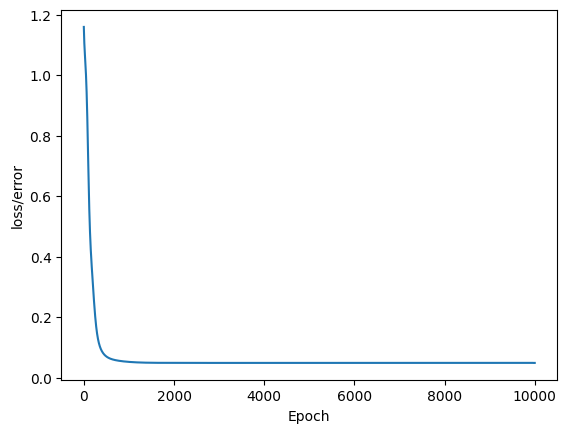

In [65]:
# Train, Need number of epochs or data runs through model
epochs = 3000
losses = []
for i in range(epochs):
  y_pred = model.forwardpass(X_train)

  # Measure Loss
  loss = crit(y_pred, y_train) # Predcited Vs Expected
  losses.append(loss.detach().numpy())

  # Print every 10 epochs
  #if i % 10 == 0:
    #print(f'Epoch: {i} and loss: {loss}')

  # Back Propagation
  opt.zero_grad()
  loss.backward()
  opt.step()

# MatPlot the epoch/error
plt.plot(range(epochs), losses)
plt.ylabel('loss/error')
plt.xlabel('Epoch')

In [66]:
# Evaluate model on Test Data (X)
# Turn off back prop
# X_test are features from test set (inputs)
# y_eval are predictions
with torch.no_grad():
  y_eval = model.forwardpass(X_test)
  loss = crit(y_eval, y_test)

In [67]:
loss

tensor(0.0023)

In [69]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forwardpass(data)

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1
      cscore = "Good"
    else:
      cscore = "Bad"

    # Will tell us the type of flower nn thinks it is
    #print(f'{i+1}.) {str(y_val)} \t {cscore}')

  print(f'We got {correct} Correct!')

We got 30 Correct!


In [70]:
# Testing
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])
with torch.no_grad():
  print(model.forwardpass(new_iris))
  newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])
with torch.no_grad():
  print(model.forwardpass(newer_iris))

In [76]:
# Save our nn Model
torch.save(model.state_dict(), 'Basic_Iris_Model.pt')

In [78]:
#Load a saved model
new_model = Model()
new_model.load_state_dict(torch.load('Basic_Iris_Model.pt'))

<ipython-input-78-b6c7077fcc1b>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('Basic_Iris_Model.pt'))


<All keys matched successfully>

In [79]:
# Check to see if it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=16, bias=True)
  (out): Linear(in_features=16, out_features=3, bias=True)
)